<h1>This Jupyter Notebook explores the Titanic dataset and implements various classifiers for predicting survival.</h1>

<h2> Let's start by importing the necessary libraries for data manipulation and visualization: </h2>

<h3>import needed libraries</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Loading the titanic dataset</h3>

In [4]:
# Load the training dataset
train_df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Explore Basic Information</h3>


In [5]:
# Display basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Distribution of classes</h3>


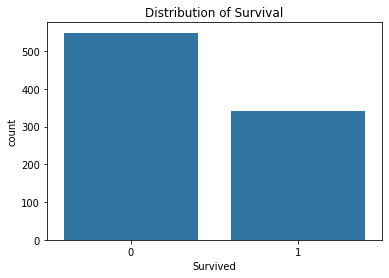

In [6]:
# Visualize the distribution of the 'Survived' variable
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.show()

### Check for Missing Values


In [7]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display missing values
missing_values

Cabin       687
Age         177
Embarked      2
dtype: int64

### Explore Basic Statistics and Distributions of Features


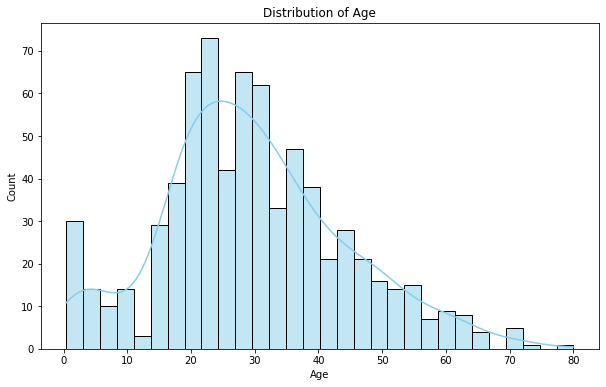

In [8]:
# Display basic statistics of numerical features
statistics_summary = train_df.describe()

# Display basic statistics of categorical features
categorical_summary = train_df.describe(include=['object'])

# Explore the distribution of 'Age' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Visualize Data to Gain Insights


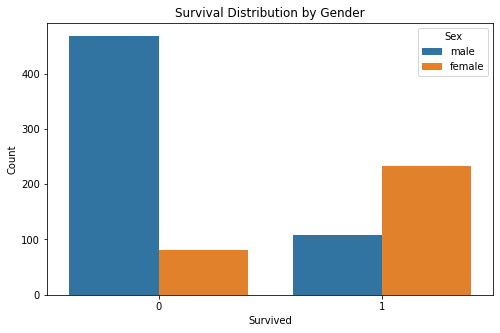

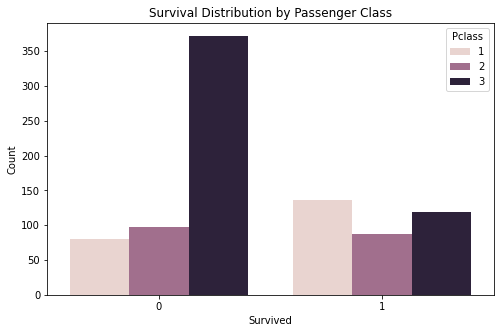

In [9]:
# Visualize the survival distribution by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

# Visualize the survival distribution by passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()


## Data Cleaning


### Handle Missing Values


In [10]:
# Check for missing values before handling
missing_values_before = train_df.isnull().sum()
missing_values_before = missing_values_before[missing_values_before > 0].sort_values(ascending=False)

# Display missing values before handling
missing_values_before

Cabin       687
Age         177
Embarked      2
dtype: int64

In [11]:
# Impute missing values for 'Age' using the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' using the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to a large number of missing values
train_df.drop('Cabin', axis=1, inplace=True)


#### Convert Categorical Variables into Numerical Representations


In [12]:
# Convert 'Sex' and 'Embarked' to numerical representations
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


#### Drop Irrelevant Features


In [13]:
# Drop irrelevant features: 'PassengerId', 'Name', 'Ticket'
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


### Check for Missing Values After Handling


In [14]:
# Check for missing values after handling
missing_values_after = train_df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0].sort_values(ascending=False)

# Display missing values after handling
missing_values_after


Series([], dtype: int64)

### Display the updated dataset after dropping irrelevant features


In [15]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


### Feature Engineering


#### Create New Features


In [16]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Create a new feature 'IsAlone' indicating whether the passenger is traveling alone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype('int')

# Display the dataset with new features
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0
2,1,3,0,26.0,0,0,7.9250,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,0,1,2,0
4,0,3,1,35.0,0,0,8.0500,0,1,1,1


#### Convert Categorical Features into One-Hot Encoded Vectors


In [17]:
# Convert categorical variable 'Pclass' into one-hot encoded vectors
pclass_dummies = pd.get_dummies(train_df['Pclass'], prefix='Pclass')
train_df = pd.concat([train_df, pclass_dummies], axis=1)
train_df.drop('Pclass', axis=1, inplace=True)

# Display the dataset with one-hot encoded vectors
train_df.head()


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,1,2,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,2,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,1,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,2,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,1,1,0,0,1


## Model Implementation


### Support Vector Machines (SVM)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [19]:
# Separate features (X) and target variable (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Initialize SVM classifier
svm_classifier = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1,1,10,100,500,1000],
    'kernel': ['linear','poly','rbf'],
    'gamma': ['scale']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X, y)

# Display the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


#### hyperparameters tuning visualization

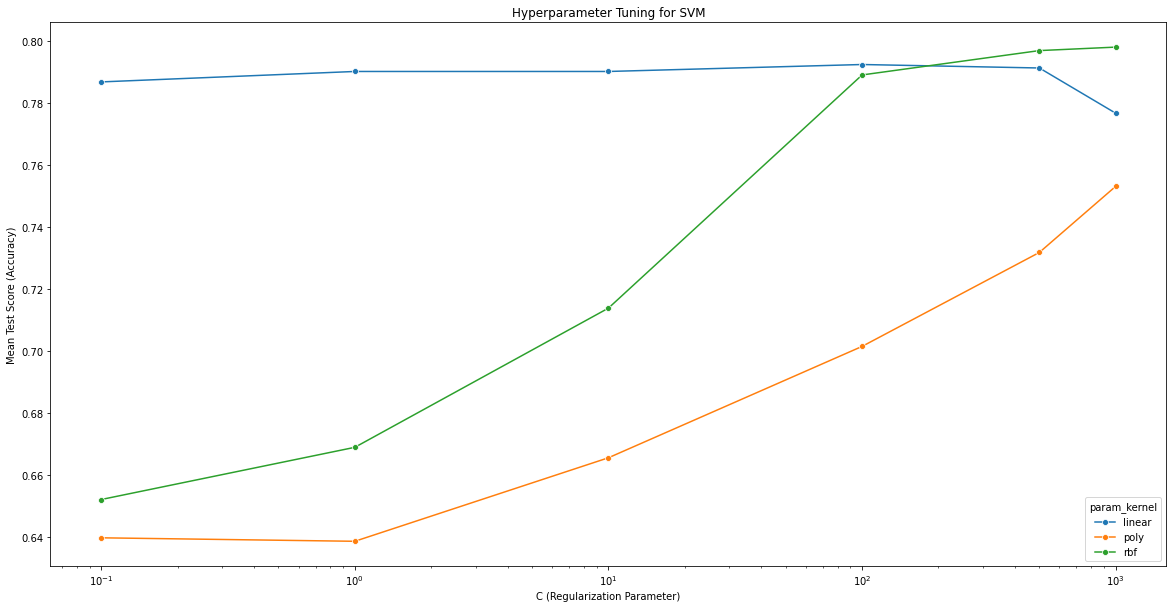

In [20]:
# Extract results of hyperparameter tuning
results = pd.DataFrame(grid_search.cv_results_)

# Plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(20, 10))
sns.lineplot(x='param_C', y='mean_test_score', hue='param_kernel', data=results, marker='o')
plt.xscale('log')
plt.title('Hyperparameter Tuning for SVM')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()




### KNN

Fitting 8 folds for each of 240 candidates, totalling 1920 fits
Best Hyperparameters for KNN: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


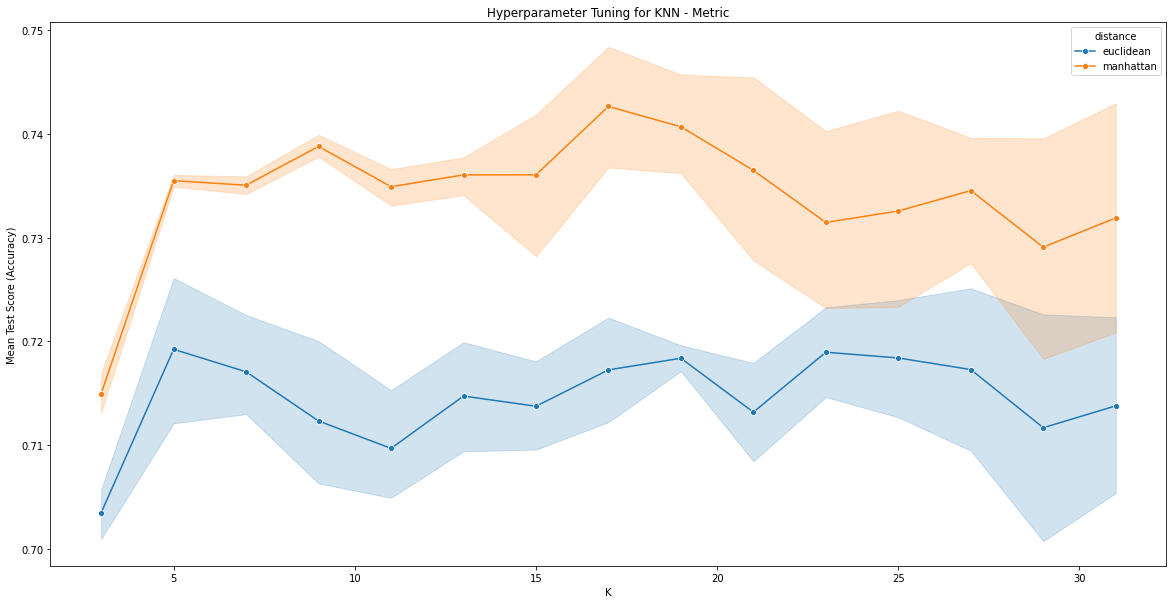

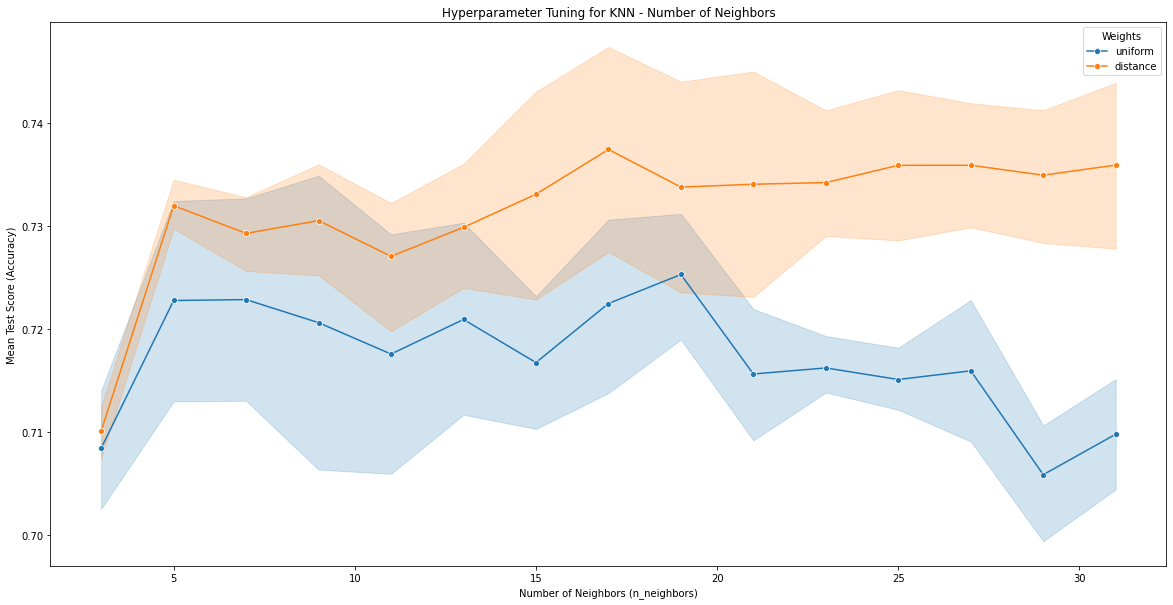

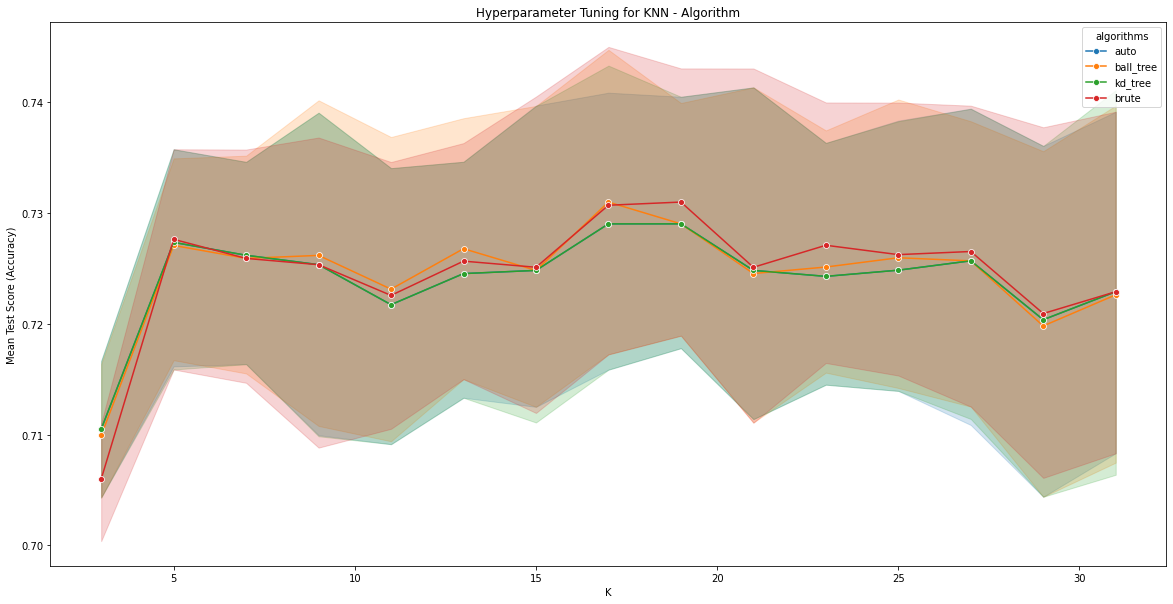

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X and y are your feature matrix and target variable

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=8, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search_knn.fit(X, y)

# Extract the results from the grid search
results_knn = pd.DataFrame(grid_search_knn.cv_results_)

# Display the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print(f"Best Hyperparameters for KNN: {best_params_knn}")

# Visualize the process of hyperparameter tuning

# Plot for 'metric'
plt.figure(figsize=(20, 10))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results_knn, marker='o')
plt.title('Hyperparameter Tuning for KNN - Metric')
plt.xlabel('K')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='distance')
plt.show()

# Plot for 'n_neighbors'
plt.figure(figsize=(20, 10))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_weights', data=results_knn, marker='o')
plt.title('Hyperparameter Tuning for KNN - Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Weights')
plt.show()

# Plot for 'algorithm'
plt.figure(figsize=(20, 10))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_algorithm', data=results_knn, marker='o')
plt.title('Hyperparameter Tuning for KNN - Algorithm')
plt.xlabel('K')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='algorithms')
plt.show()



### Bayesian Classifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters for Bayesian Classifier: {'var_smoothing': 1e-05}


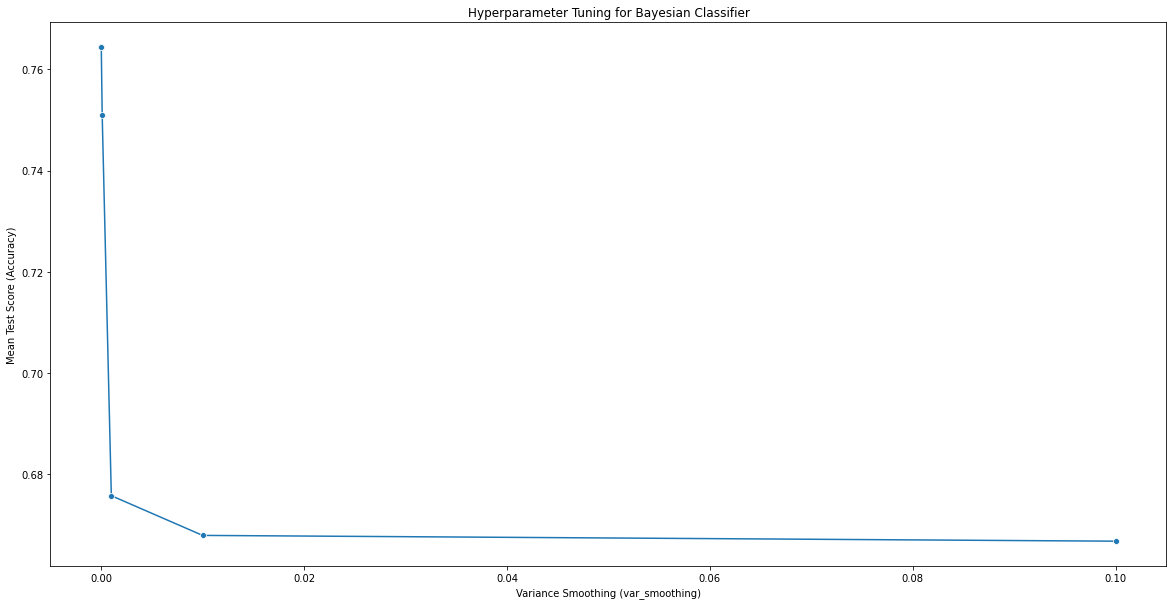

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Assuming 'X' and 'y' are already defined from your dataset
# Separate features (X) and target variable (y)

# Create a Gaussian Naive Bayes classifier
bayes_classifier = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_bayes = {
    'var_smoothing': [ 0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_bayes = GridSearchCV(bayes_classifier, param_grid_bayes, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search_bayes.fit(X, y)

# Display the best hyperparameters for Bayesian classifier
best_params_bayes = grid_search_bayes.best_params_
print(f"Best Hyperparameters for Bayesian Classifier: {best_params_bayes}")

# Visualize the process of hyperparameter tuning
results_bayes = pd.DataFrame(grid_search_bayes.cv_results_)

# Plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(20, 10))
sns.lineplot(x='param_var_smoothing', y='mean_test_score', data=results_bayes, marker='o')
plt.title('Hyperparameter Tuning for Bayesian Classifier')
plt.xlabel('Variance Smoothing (var_smoothing)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()


### Decision Tree

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.5, 0.8],
    'max_leaf_nodes': [None, 5, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.5]
}


# Initialize GridSearchCV for hyperparameter tuning
grid_search_tree = GridSearchCV(tree_classifier, param_grid_tree, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search_tree.fit(X, y)

# Display the best hyperparameters for Decision Tree
best_params_tree = grid_search_tree.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_params_tree}")

# Visualize the process of hyperparameter tuning
results_tree = pd.DataFrame(grid_search_tree.cv_results_)



Fitting 5 folds for each of 38400 candidates, totalling 192000 fits
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'best'}


#### visualizations of decisoin tree

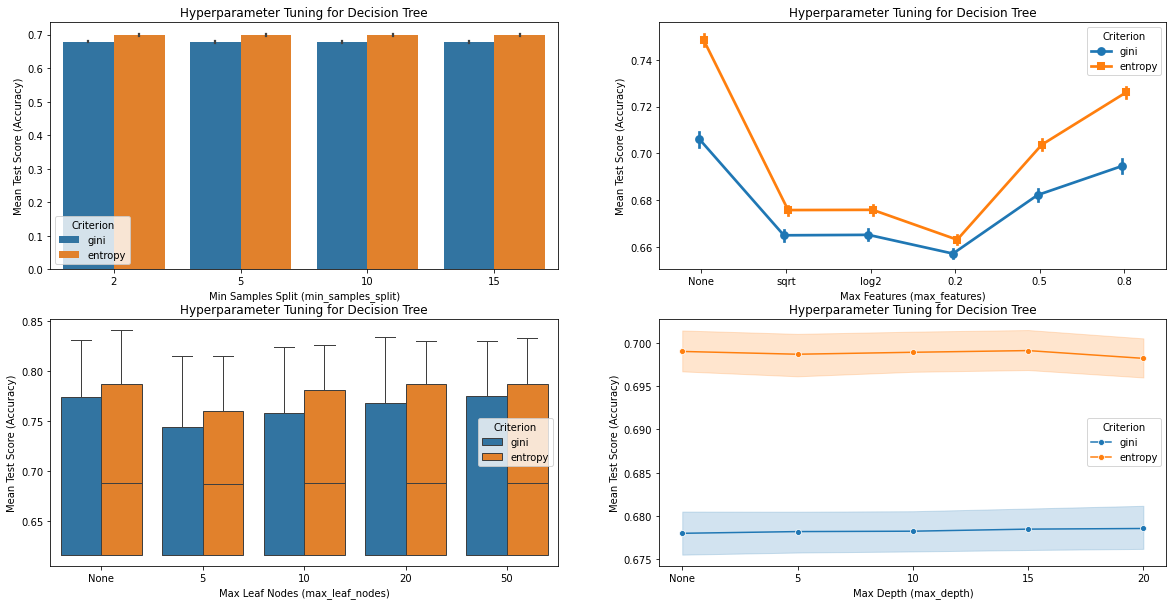

<Figure size 432x288 with 0 Axes>

In [24]:

# Additional visualizations
plt.figure(figsize=(20, 10))

# Convert 'None' values to a string for visualization
results_tree['param_max_depth'] = results_tree['param_max_depth'].astype(str)
results_tree['param_min_samples_split'] = results_tree['param_min_samples_split'].astype(str)
results_tree['param_max_features'] = results_tree['param_max_features'].astype(str)
results_tree['param_max_leaf_nodes'] = results_tree['param_max_leaf_nodes'].astype(str)

# Plot 1: Min Samples Split 
plt.subplot(2, 2, 1)
sns.barplot(x='param_min_samples_split', y='mean_test_score', hue='param_criterion', data=results_tree)
plt.title('Hyperparameter Tuning for Decision Tree')
plt.xlabel('Min Samples Split (min_samples_split)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Criterion')

# Plot 2: Max Features 
plt.subplot(2, 2, 2)
sns.pointplot(x='param_max_features', y='mean_test_score', hue='param_criterion', data=results_tree, dodge=True, markers=['o', 's'])
plt.title('Hyperparameter Tuning for Decision Tree')
plt.xlabel('Max Features (max_features)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Criterion')

# Plot 3: Max Leaf Nodes 
plt.subplot(2, 2, 3)
sns.boxplot(x='param_max_leaf_nodes', y='mean_test_score', hue='param_criterion', data=results_tree)
plt.title('Hyperparameter Tuning for Decision Tree')
plt.xlabel('Max Leaf Nodes (max_leaf_nodes)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Criterion')

# Plot3: Max depth 
plt.subplot(2, 2, 4)
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_criterion', data=results_tree, marker='o')
plt.title('Hyperparameter Tuning for Decision Tree')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Criterion')
plt.show()

plt.tight_layout()
plt.show()



### Multi layer perceptron 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'X' and 'y' are already defined from your dataset
# Separate features (X) and target variable (y)

# Create an MLP (Multi-Layer Perceptron) classifier
mlp_classifier = MLPClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning
grid_search_mlp.fit(X, y)

# Display the best hyperparameters for MLP
best_params_mlp = grid_search_mlp.best_params_
print(f"Best Hyperparameters for MLP: {best_params_mlp}")

# Visualize the process of hyperparameter tuning (example plot)
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

# Print unique values in 'param_hidden_layer_sizes' column
unique_values = results_mlp['param_hidden_layer_sizes'].unique()
print("Unique values in 'param_hidden_layer_sizes':", unique_values)



Fitting 2 folds for each of 486 candidates, totalling 972 fits
Best Hyperparameters for MLP: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 100}
Unique values in 'param_hidden_layer_sizes': [(100,) (50, 50)]


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


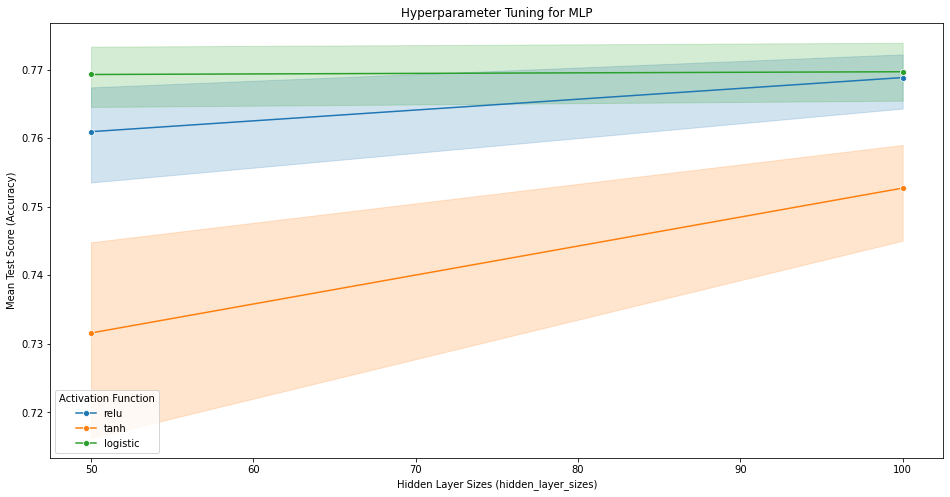

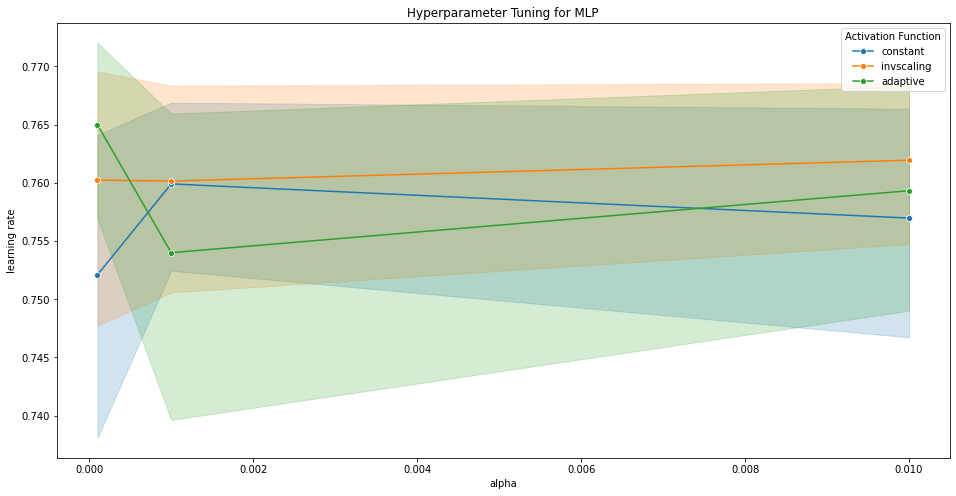

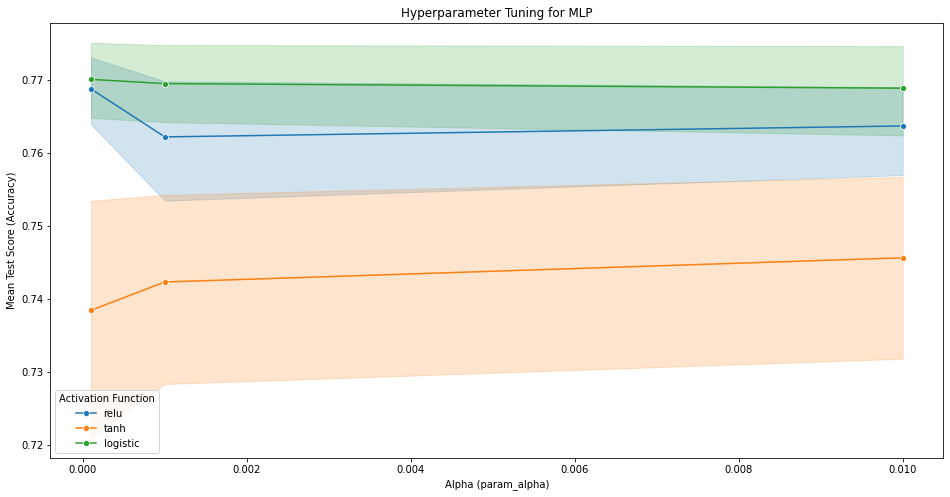

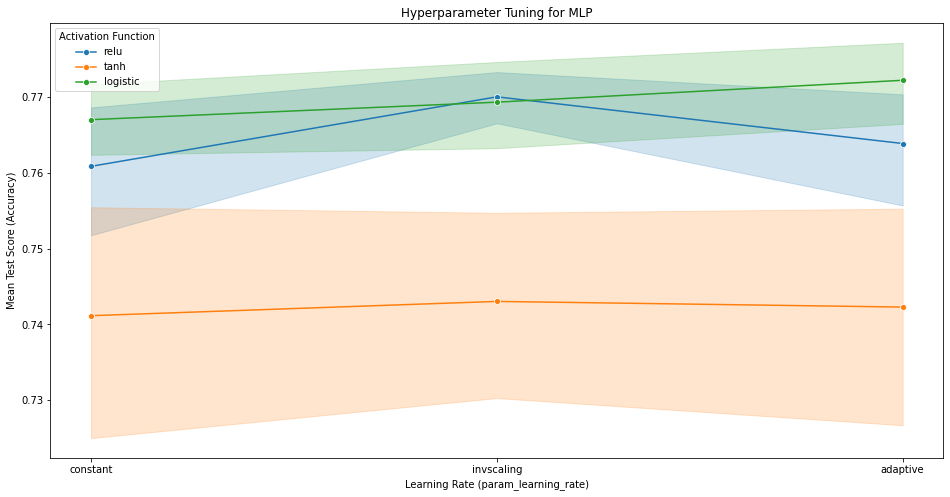

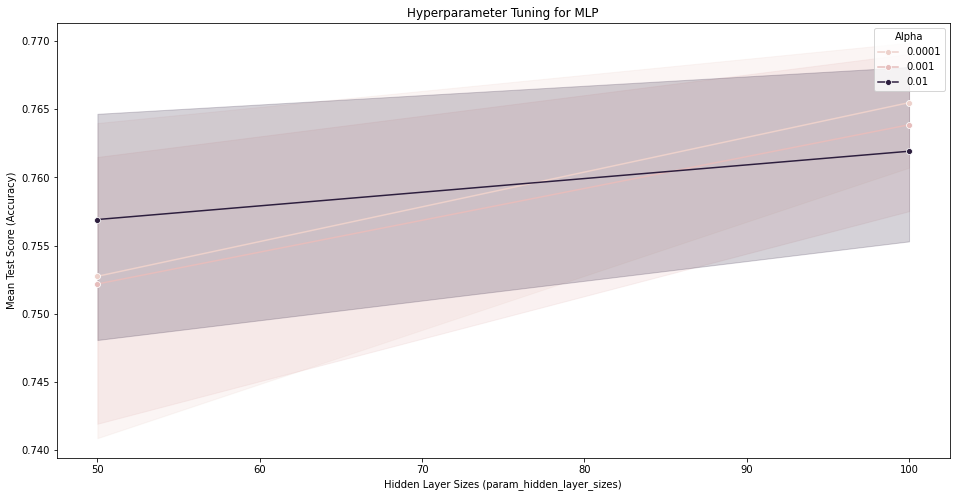

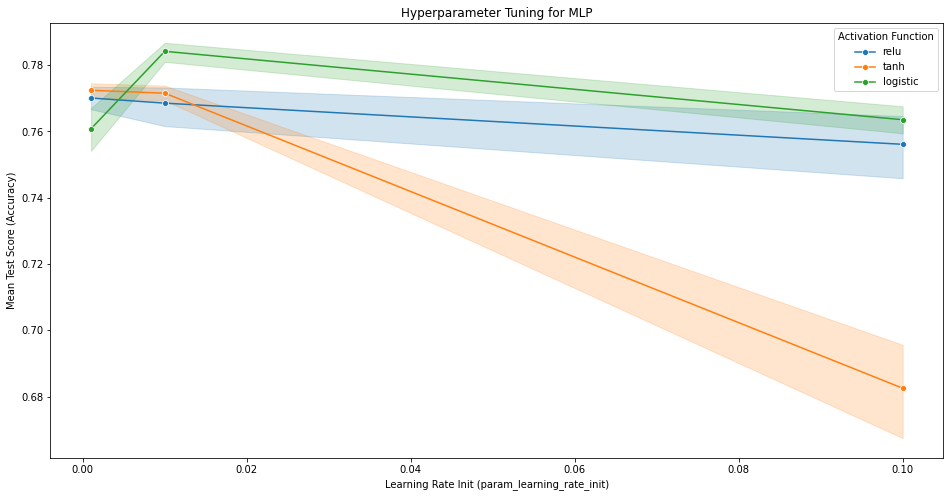

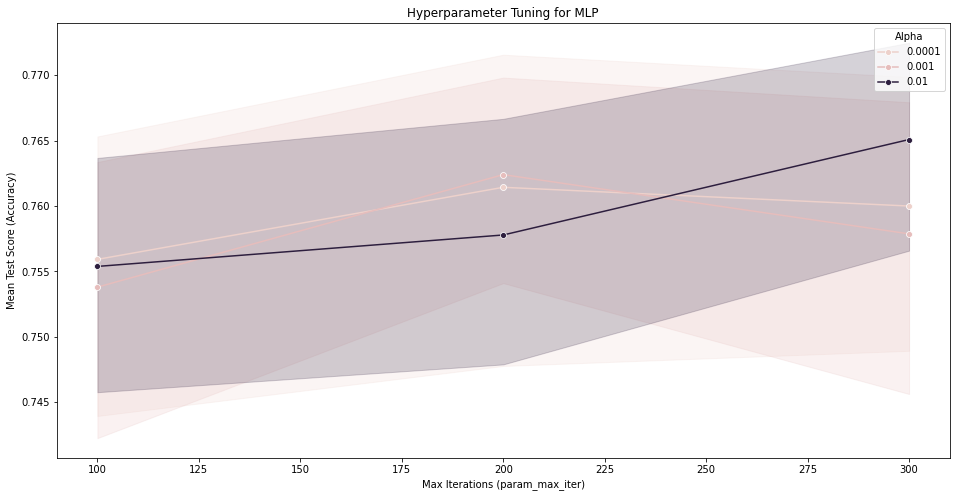

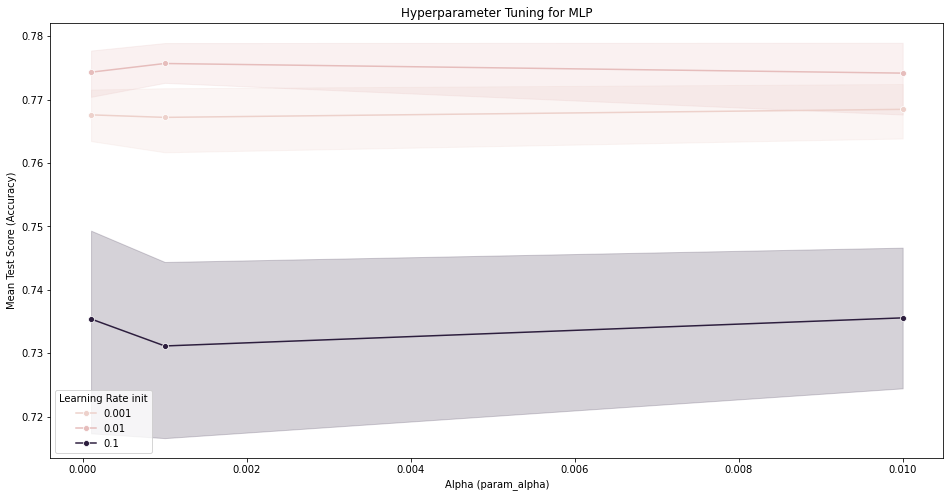

In [36]:
# Convert 'param_hidden_layer_sizes' to numeric
results_mlp['param_hidden_layer_sizes'] = results_mlp['param_hidden_layer_sizes'].apply(lambda x: x[0] if isinstance(x, tuple) else x)
results_mlp['param_hidden_layer_sizes'] = pd.to_numeric(results_mlp['param_hidden_layer_sizes'], errors='coerce')

# Visualize the process of hyperparameter tuning (example plot)
plt.figure(figsize=(16, 8))
sns.lineplot(x='param_hidden_layer_sizes', y='mean_test_score', hue='param_activation', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Hidden Layer Sizes (hidden_layer_sizes)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Activation Function')
plt.show()

# Visualize the process of hyperparameter tuning for a different plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='param_alpha', y='mean_test_score', hue='param_learning_rate', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('alpha')
plt.ylabel('learning rate')
plt.legend(title='Activation Function')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_alpha', y='mean_test_score', hue='param_activation', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Alpha (param_alpha)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Activation Function')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_learning_rate', y='mean_test_score', hue='param_activation', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Learning Rate (param_learning_rate)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Activation Function')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_hidden_layer_sizes', y='mean_test_score', hue='param_alpha', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Hidden Layer Sizes (param_hidden_layer_sizes)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Alpha')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_learning_rate_init', y='mean_test_score', hue='param_activation', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Learning Rate Init (param_learning_rate_init)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Activation Function')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_max_iter', y='mean_test_score', hue='param_alpha', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Max Iterations (param_max_iter)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Alpha')
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(x='param_alpha', y='mean_test_score', hue='param_learning_rate_init', data=results_mlp, marker='o')
plt.title('Hyperparameter Tuning for MLP')
plt.xlabel('Alpha (param_alpha)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Learning Rate init')
plt.show()

